In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
plt.style.use('dark_background')

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# algorithms
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

**Exploratory Data Analysis**

In [2]:
# loading the data set
file = ('adult.csv')
df = pd.read_csv(file, encoding='latin-1')

In [3]:
# shape of the data set
df.shape

(32561, 15)

In [4]:
# Previewing the data set
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


the preview shows that the dataset contains values coded as `?`. So, I will encode `?` as NaN values.

In [5]:
df[df == '?'] = np.nan

In [6]:
# summary of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now, the summary shows that the variables - workclass, occupation and native.country contain missing values. All of these variables are categorical data type. So, imputing the missing values with the most frequent value- the mode.

In [7]:
# imputing the missing values with mode
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


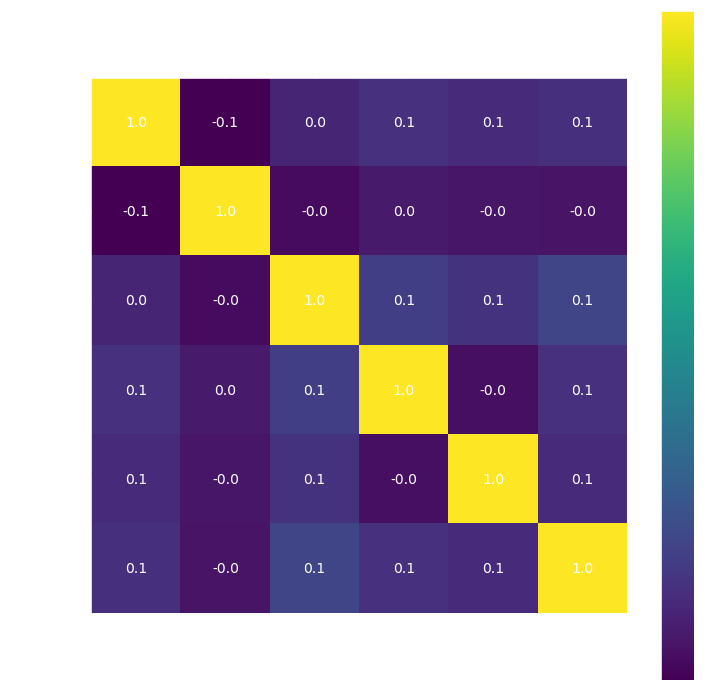

In [10]:
# ploting the correlation between the output(income) and individual features
rcParams['figure.figsize'] = 12, 12
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [11]:
# dropping fnlwgt since it has 0 correlation
df.drop(['fnlwgt'], axis = 1, inplace = True)

In [12]:
# Dropping Education- Education No. should be enough
df.drop(['education'], axis = 1, inplace = True)

In [13]:
dataset=df.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E092828F60>,
      dtype=object)

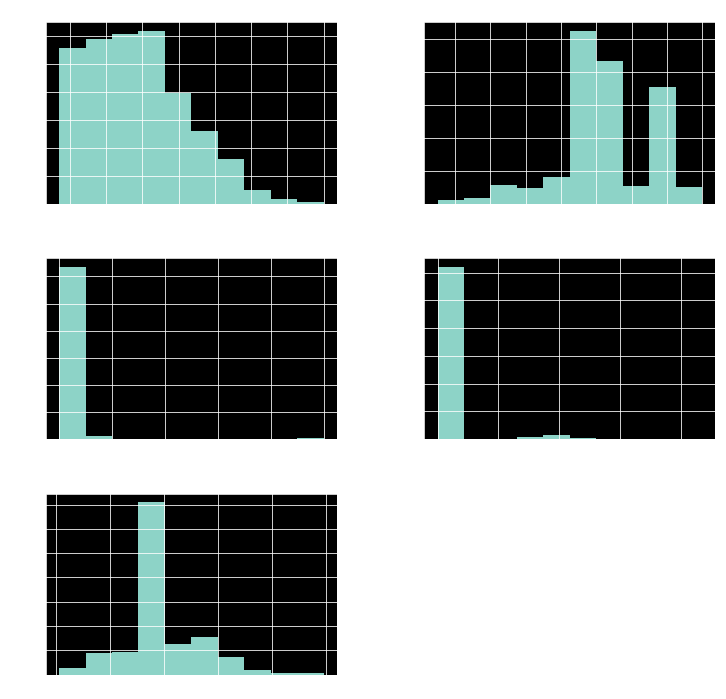

In [14]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution 
# of those features in the dataset

rcParams['figure.figsize'] = 12, 12
df[['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].hist()#

age is highly skewed. applying log transformation

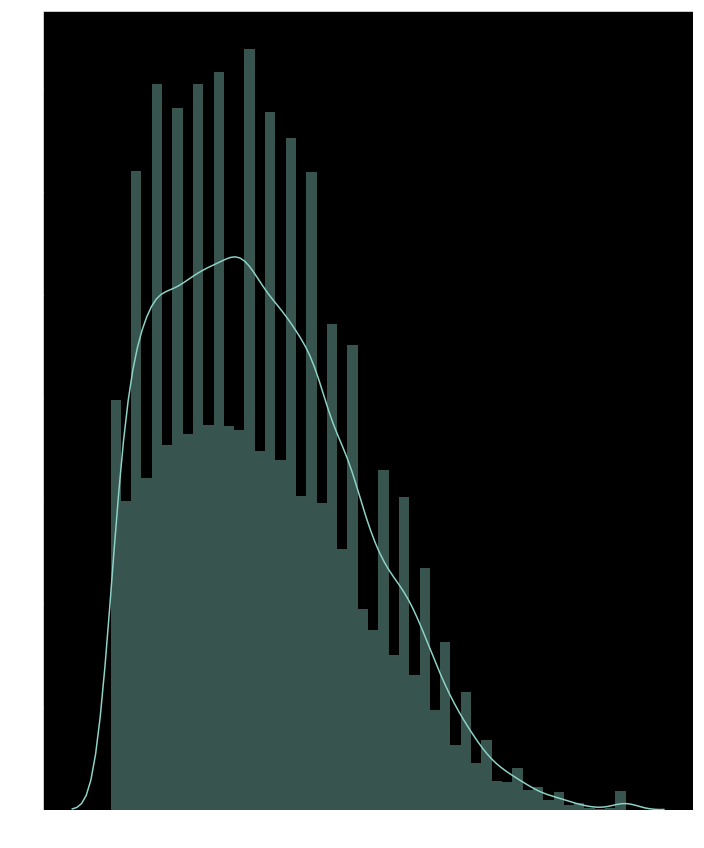

In [15]:
#Unskew the data with log transformation
df[['age']].apply(np.log, axis = 1).round(3)


# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(1, 1, 1); sns.distplot(df.age, label = 'Age')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [16]:
# setting x as input features and y as target feature
X = df.drop(['income'], axis=1)
y = df['income']

In [17]:
X.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [18]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [19]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Feature Engineering**

In [20]:
# encoding categorical variables
from sklearn import preprocessing

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

**Feature Scaling**

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [22]:
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.315068,0.857143,0.800000,0.333333,0.230769,1.0,1.0,0.0,0.0,0.0,0.193878,0.95
1,0.301370,0.142857,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.0,0.0,0.377551,0.95
2,0.342466,0.428571,0.600000,0.666667,0.230769,0.2,1.0,0.0,0.0,0.0,0.397959,0.95
3,0.136986,0.142857,0.533333,0.666667,0.307692,0.6,1.0,1.0,0.0,0.0,0.397959,0.95
4,0.287671,0.000000,0.866667,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.397959,0.95


In [23]:
#Applying the GaussianNB algorithm
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)
df_pred = pd.DataFrame(y_pred, columns=['Income Predicted - GaussianNB'])
df_out = pd.concat([y_test.reset_index(drop='Tru‌​e'), df_pred.reset_index(drop='Tru‌​e')],axis=1)

             precision    recall  f1-score   support

      <=50K       0.82      0.95      0.88      7410
       >50K       0.69      0.33      0.44      2359

avg / total       0.79      0.80      0.77      9769

[[7061  349]
 [1587  772]]
80.18220902855973


In [24]:
#Applying the BernoulliNB algorithm
bernouli = BernoulliNB()
bernouli.fit(X_train, y_train)
y_pred = bernouli.predict(X_test)
acc_bernouli = round(bernouli.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)
df_pred = pd.DataFrame(y_pred, columns=['Income Predicted - BernouliNB'])
df_out = pd.concat([df_out.reset_index(drop='Tru‌​e'), df_pred.reset_index(drop='Tru‌​e')],axis=1)

             precision    recall  f1-score   support

      <=50K       0.89      0.72      0.80      7410
       >50K       0.45      0.72      0.56      2359

avg / total       0.79      0.72      0.74      9769

[[5358 2052]
 [ 650 1709]]
72.34107892312417


In [25]:
#Applying the MultinomialNB algorithm
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)
y_pred = multinomial.predict(X_test)
acc_multinomial = round(multinomial.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)
df_pred = pd.DataFrame(y_pred, columns=['Income Predicted - MultinomialNB'])
df_out = pd.concat([df_out.reset_index(drop='Tru‌​e'), df_pred.reset_index(drop='Tru‌​e')],axis=1)

             precision    recall  f1-score   support

      <=50K       0.76      1.00      0.87      7410
       >50K       1.00      0.02      0.04      2359

avg / total       0.82      0.76      0.67      9769

[[7410    0]
 [2309   50]]
76.36400859862832


In [26]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['BernouliNB', 'GaussianNB', 'MultinomialNB'],
    'Score': [acc_gaussian, acc_bernouli, acc_multinomial]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(3)

,Model
Score,
80.19,BernouliNB
76.43,MultinomialNB
72.28,GaussianNB


In [27]:
df_out.rename(columns={'income': 'Income Actual'}, inplace=True)
df_out.to_csv('output.csv', sep='\t', encoding='utf-8')